# Replicating results of Smith and Randall 2015
Purpose of this notebook is to replicate the results of "Rolling element bearing diagnostics using the Case Western
Reserve University data: A benchmark study"
http://dx.doi.org/10.1016/j.ymssp.2015.04.021

## Plotting methods

In [2]:
import glob

import numpy as np
import matplotlib.pyplot as plt

from randall_methods import randall_method_1, randall_method_2, randall_method_22, randall_method_3
import data_utils as du

%matplotlib inline


def plot_method_1(title, time, signal, sq_env_f, sq_env, x1lim=None, y1lim=None, x2lim=None, y2lim=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    
    ax1.plot(time, signal, c="b", linewidth=0.5)
    ax2.plot(sq_env_f, sq_env, c="b", linewidth=0.5)
   
    # Set axis limits using "or" for cleaner syntax
    ax1.set_xlim(x1lim or (0, 5))
    ax1.set_ylim(y1lim or (-5, 5))
    ax2.set_xlim(x2lim or (0, 500))
    ax2.set_ylim(y2lim or (0, 5))

    ax1.set_title("a", loc="left")
    ax2.set_title("b", loc="left")
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# def plot_method_2(title, time, signal, sq_env_f, sq_env, x1lim=None, y1lim=None, x2lim=None, y2lim=None):

def plot_method_3(title, time, signal, sq_env_f, sq_env, ylim=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ax1.plot(time, signal, c="b", linewidth=0.5)
    ax2.plot(sq_env_f, sq_env, c="b", linewidth=0.5)

    ax1.set_xlim(2, 10)
    ax2.set_xlim(0, 550)
    ax1.set_title("a", loc="left")
    ax2.set_title("b", loc="left")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()



def plot_ax2_only(title, sq_env_f, sq_env, x1lim=None, y1lim=None):
    fig, ax2 = plt.subplots(figsize=(3.5, 3))  # Single plot for ax2
    ax2.plot(sq_env_f, sq_env, c="b", linewidth=0.5)
   
    # Axis limits
    ax2.set_xlim(x1lim or (0, 5))
    ax2.set_ylim(y1lim or (-5, 5))
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()


## 6.3.1. Inner race faults

#### Fig. 5

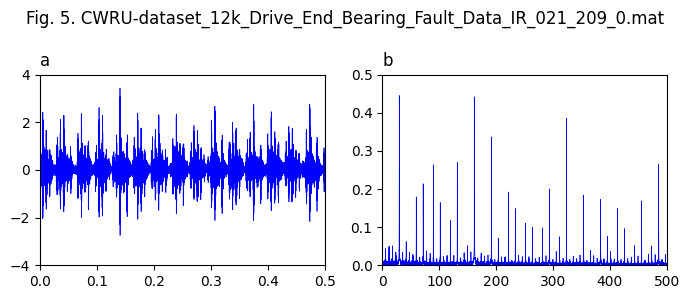

In [4]:
'''
Fig. 5. Record 209DE (12k, 0.021 in. drive end inner race fault, 1797 rpm).
(a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from
Method 1 (raw signal); Y1 diagnosis.
'''
fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*209*.mat", recursive=True)
title = "Fig. 5. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0, 0.5), (-4, 4), (0, 500), (0, 0.5))


#### Fig. 6

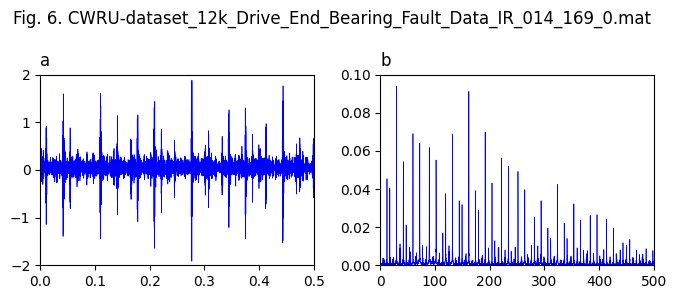

In [5]:
'''
Fig. 6. Record 169DE (12k, 0.014 in. drive end inner race fault, 1797 rpm).
(a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method 1 (raw
signal); Y2 diagnosis.
'''
fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*169*.mat", recursive=True)
title = "Fig. 6. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0, 0.5), (-2, 2), (0, 500), (0, 0.1))

#### Fig. 20

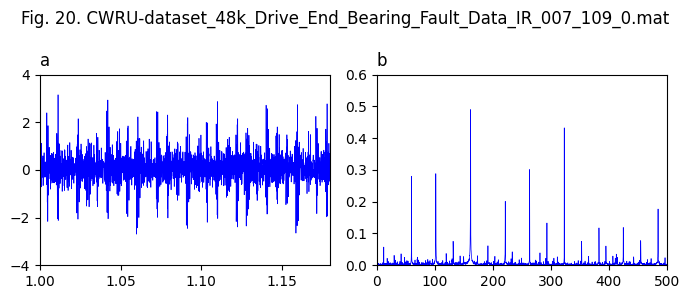

'\n    #ax1\n    x = [1.0036619718309858, 1.0111267605633802, 1.0043661971830986, 1.0235211267605635, 1.0111267605633802, 1.0416901408450705, 1.0354929577464789, 1.0595774647887324, 1.0725352112676056, 1.0543661971830987, 1.1104225352112678, 1.0914084507042254, 1.1229577464788734, 1.140704225352113, 1.1601408450704227]\n    y = [2.317327766179541, 3.0438413361169108, -2.2171189979123174, 2.041753653444677, -2.1670146137787056, 2.8267223382045934, -1.5991649269311066, -2.759916492693111, 2.325678496868476, 1.7912317327766183, 2.759916492693111, -2.5177453027139878, -2.4843423799582465, 2.5929018789144056, 2.6346555323590817]\n    ax1.scatter(x,y)\n    #ax2\n    x = [59.38864628820958, 101.31004366812236, 160.69868995633195, 259.82532751091713, 218.77729257641928, 320.96069868995636, 290.39301310043675]\n    y = [0.2832661290322581, 0.28870967741935494, 0.5016129032258065, 0.3008064516129033, 0.2022177419354839, 0.4320564516129033, 0.1338709677419355]\n    ax2.scatter(x,y)\n'

In [6]:
'''
Fig. 20. Record 109DE (48k, 0.007 in. drive end inner race fault, 1797 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method 1 (raw
signal); Y2 diagnosis.
'''

fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*109*.mat", recursive=True)
title = "Fig. 20. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (1, 1.18), (-4, 4), (0, 500), (0, 0.6))

'''
    #ax1
    x = [1.0036619718309858, 1.0111267605633802, 1.0043661971830986, 1.0235211267605635, 1.0111267605633802, 1.0416901408450705, 1.0354929577464789, 1.0595774647887324, 1.0725352112676056, 1.0543661971830987, 1.1104225352112678, 1.0914084507042254, 1.1229577464788734, 1.140704225352113, 1.1601408450704227]
    y = [2.317327766179541, 3.0438413361169108, -2.2171189979123174, 2.041753653444677, -2.1670146137787056, 2.8267223382045934, -1.5991649269311066, -2.759916492693111, 2.325678496868476, 1.7912317327766183, 2.759916492693111, -2.5177453027139878, -2.4843423799582465, 2.5929018789144056, 2.6346555323590817]
    ax1.scatter(x,y)
    #ax2
    x = [59.38864628820958, 101.31004366812236, 160.69868995633195, 259.82532751091713, 218.77729257641928, 320.96069868995636, 290.39301310043675]
    y = [0.2832661290322581, 0.28870967741935494, 0.5016129032258065, 0.3008064516129033, 0.2022177419354839, 0.4320564516129033, 0.1338709677419355]
    ax2.scatter(x,y)
'''


#### Fig. 21

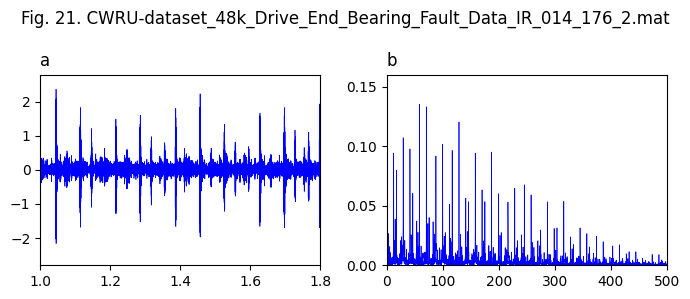

'\n# Scatters\nx = [1.1151712887438825, 1.2169657422512234, 1.2861337683523655, 1.3892332789559543, 1.4564437194127242, 1.5275693311582383, 1.6280587275693312, 1.0460032626427405, 1.1164763458401303, 1.1464926590538336, 1.2163132137030994, 1.2867862969004893, 1.3161500815660685, 1.3546492659053833, 1.3879282218597064, 1.4570962479608482, 1.5256117455138662, 1.6280587275693312]\ny = [1.8079470198675498, 1.4900662251655628, 1.576158940397351, 1.8013245033112582, 2.2649006622516556, 1.3046357615894038, 1.6357615894039736, -2.145695364238411, -1.6754966887417218, -1.086092715231788, -1.271523178807947, -1.5231788079470199, -1.0397350993377483, -0.7615894039735099, -1.6754966887417218, -1.966887417218543, -1.2119205298013245, -1.6688741721854305]\n\nx = [60, 101.33333333333334, 159.11111111111111, 217.33333333333334, 258.6666666666667, 288, 418.6666666666667, 318.6666666666667, 346.6666666666667, 377.77777777777777]\ny = [0.27962962962962956, 0.28827160493827153, 0.5018518518518519, 0.20061

In [7]:
'''
Fig. 21. Record 176DE (48k, 0.014 in. drive end inner race fault, 1750 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method 1 (raw
signal); P1 diagnosis.
'''
fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*176*.mat", recursive=True)
title = "Fig. 21. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (1, 1.8), (-2.8, 2.8), (0, 500), (0, 0.16))
'''
# Scatters
x = [1.1151712887438825, 1.2169657422512234, 1.2861337683523655, 1.3892332789559543, 1.4564437194127242, 1.5275693311582383, 1.6280587275693312, 1.0460032626427405, 1.1164763458401303, 1.1464926590538336, 1.2163132137030994, 1.2867862969004893, 1.3161500815660685, 1.3546492659053833, 1.3879282218597064, 1.4570962479608482, 1.5256117455138662, 1.6280587275693312]
y = [1.8079470198675498, 1.4900662251655628, 1.576158940397351, 1.8013245033112582, 2.2649006622516556, 1.3046357615894038, 1.6357615894039736, -2.145695364238411, -1.6754966887417218, -1.086092715231788, -1.271523178807947, -1.5231788079470199, -1.0397350993377483, -0.7615894039735099, -1.6754966887417218, -1.966887417218543, -1.2119205298013245, -1.6688741721854305]

x = [60, 101.33333333333334, 159.11111111111111, 217.33333333333334, 258.6666666666667, 288, 418.6666666666667, 318.6666666666667, 346.6666666666667, 377.77777777777777]
y = [0.27962962962962956, 0.28827160493827153, 0.5018518518518519, 0.20061728395061723, 0.29999999999999993, 0.13148148148148148, 0.11666666666666667, 0.43148148148148147, 0.07592592592592592, 0.11851851851851852]

'''

#### Fig 22

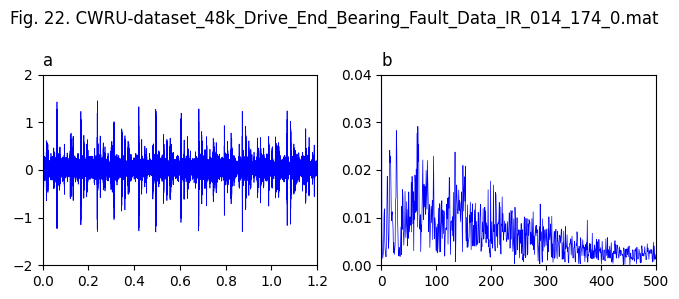

In [8]:
'''
Fig. 22. Record 174DE (48k, 0.014 in. drive end inner race fault, 1797 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method 1 (raw
signal); N1 diagnosis.
'''

fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*174*.mat", recursive=True)
title = "Fig. 22. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

'''    
    # Scatters
    x = [0.06341463414634135, 0.1658536585365852, 0.4195121951219512, 0.6068292682926831, 0.8741463414634145, 0.06048780487804876, 0.16975609756097562, 0.23902439024390246, 0.41756097560975614, 0.3121951219512194, 0.6848780487804879]
    y = [1.3882544861337682, 1.1761827079934744, 1.2740619902120716, 1.1468189233278956, 1.189233278955954, -1.2838499184339316, -1.2088091353996737, -1.33278955954323, -1.3164763458401305, -1.0815660685154975, -1.3197389885807504]
    ax1.scatter(x,y)
    
    x = [14.857142857142813, 28.571428571428477, 66.85714285714279, 34.28571428571422, 72.00000000000003, 94.28571428571425, 94.28571428571425, 135.42857142857136, 134.28571428571422, 197.14285714285705, 215.42857142857144, 284.5714285714285, 218.28571428571425, 218.28571428571425, 240.57142857142847, 152.57142857142856, 152.57142857142856, 147.99999999999994]
    y = [0.024272300469483567, 0.028262910798122064, 0.029154929577464787, 0.0020657276995305167, 0.002863849765258216, 0.022863849765258216, 0.022863849765258216, 0.0007511737089201873, 0.02375586854460094, 0.017699530516431923, 0.0024882629107981225, 0.012769953051643194, 0.014507042253521127, 0.014507042253521127, 0.0005633802816901456, 0.0207981220657277, 0.0207981220657277, 0.002863849765258216]
    ax2.scatter(x,y)
    
    '''

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0, 1.2), (-2,2), (0, 500), (0, 0.04))

#### Fig. 30

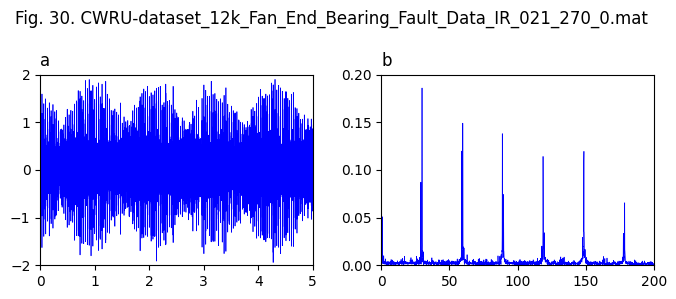

In [9]:
'''
Fig. 30. Record 270FE (12k, 0.021 in. fan end inner race fault, 1797 rpm). (a) Raw time signal; cursors at 1.11 s (¼ 1/{5fr–BPFI}). (b) Envelope spectrum from
Method 1 (raw signal); finely tuned cursors at: fr harmonics (red), BPFI (black dash-dot), fr sidebands around BPFI (black dot); Y2 diagnosis. (For
interpretation of the references to colour in this figure legend, the reader is referred to the web version of this article.)
'''
fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*270*.mat", recursive=True)
title = "Fig. 30. " + mat_files[0].replace("/", "_")
_, signal, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0,5), (-2,2), (0, 200), (0, 0.2))

## 6.3.2 Outer race faults

#### Fig. 11

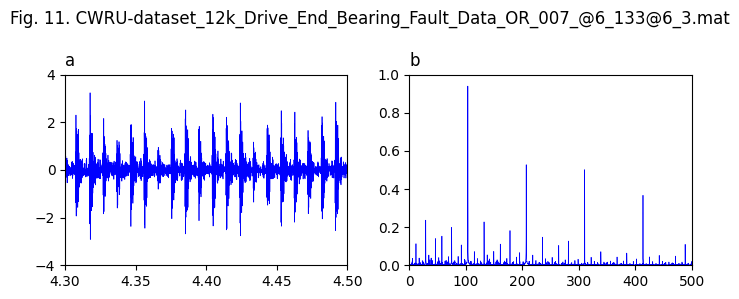

In [10]:
'''
Fig. 11. Record 133DE (12k, 0.007 in. drive end outer race fault centred, 1730 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method
1 (raw signal); Y1 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*133*.mat", recursive=True)
title = "Fig. 11. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (4.3, 4.5), (-4, 4), None, (0, 1))


#### Fig. 14

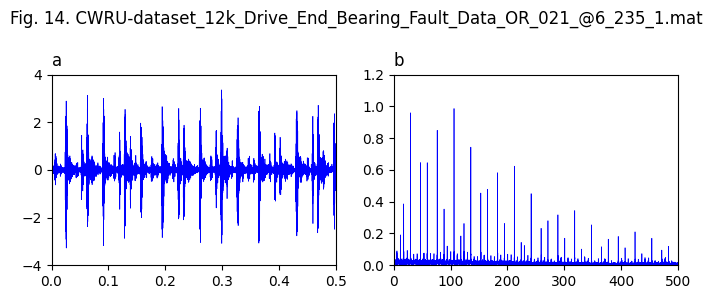

In [11]:
'''
Fig. 14. Record 235DE (12k, 0.021 in. drive end outer race fault centred, 1772 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method
1 (raw signal); Y2 diagnosis
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*235*.mat", recursive=True)
title = "Fig. 14. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0, 0.5), (-4, 4), None, (0, 1.2))



#### Fig. 15


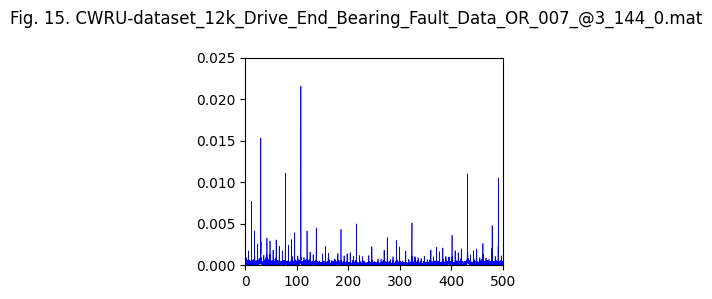

In [12]:
'''
Fig. 15. Record 144FE (12k, 0.007 in. drive end outer race fault orthogonal, 1797 rpm). Envelope spectrum from Method 1 (raw signal); Y2 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*144*.mat", recursive=True)
title = "Fig. 15. " + mat_files[0].replace("/", "_")
_, signal, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_ax2_only(title, sq_env_f, sq_env, (0, 500), (0, 0.025))

#### Fig. 16

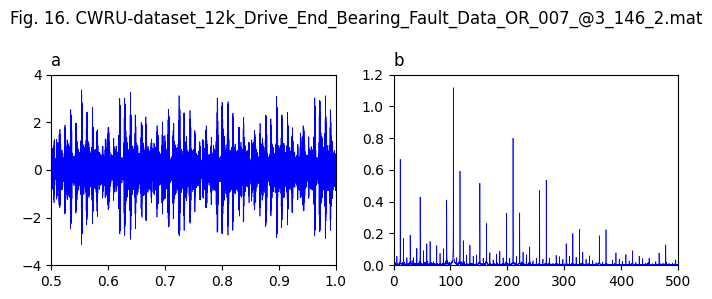

In [13]:
'''
Fig. 16. Record 146DE (12k, 0.007 in. drive end outer race fault orthogonal, 1750 rpm). (a) Raw time signal; cursors at 1/FTF (b) Envelope spectrum from
Method 1 (raw signal); Y2 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*146*.mat", recursive=True)
title = "Fig. 16. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0.5, 1), (-4, 4), None, (0, 1.2))

#### Fig. 17

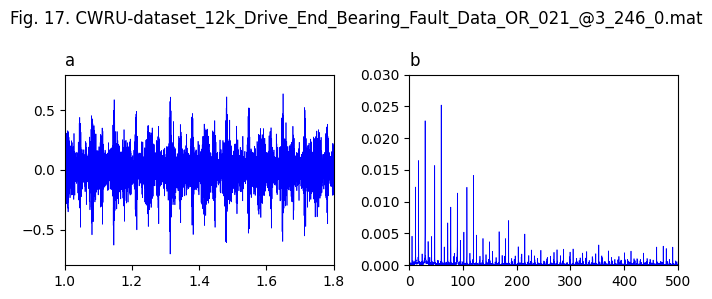

In [3]:
'''
Fig. 17. Record 246BA (12k, 0.021 in. drive end outer race fault orthogonal, 1797 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from
Method 1 (raw signal); P1 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*246*.mat", recursive=True)
title = "Fig. 17. " + mat_files[0].replace("/", "_")
_, _, signal, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

# Scatters
'''
    x = [1.0436363636363637, 1.0793388429752064, 1.0793388429752064, 1.1447933884297519, 1.1447933884297519, 1.2142148760330578, 1.2479338842975205, 1.1745454545454546, 1.1745454545454546, 1.1084297520661157, 1.1084297520661157, 1.3133884297520662, 1.3808264462809916, 1.3808264462809916, 1.415206611570248, 1.4813223140495868, 1.4813223140495868, 1.544793388429752, 1.6485950413223138, 1.7107438016528924, 1.008595041322314, 1.0462809917355371, 1.078677685950413, 1.078677685950413, 1.1461157024793387, 1.112396694214876, 1.112396694214876, 1.1765289256198348, 1.1765289256198348, 1.2142148760330578, 1.2459504132231405, 1.2459504132231405, 1.27900826446281, 1.27900826446281, 1.3127272727272725, 1.3127272727272725, 1.48, 1.4456198347107436, 1.5434710743801654, 1.6122314049586777]
    y = [0.4376053962900506, 0.4595278246205733, 0.4595278246205733, 0.5893760539629005, 0.5893760539629005, 0.48313659359190564, 0.3684654300168635, 0.34317032040472184, 0.34317032040472184, 0.35497470489038785, 0.35497470489038785, 0.6062394603709949, 0.5016863406408094, 0.5016863406408094, 0.3920741989881956, 0.6079258010118045, 0.6079258010118045, 0.518549747048904, 0.6416526138279932, 0.5168634064080944, -0.3617200674536256, -0.4898819561551433, -0.5539629005059022, -0.5539629005059022, -0.6382799325463744, -0.46290050590219234, -0.46290050590219234, -0.43423271500843175, -0.43423271500843175, -0.5050590219224284, -0.47807757166947723, -0.47807757166947723, -0.454468802698145, -0.454468802698145, -0.7141652613827993, -0.7141652613827993, -0.6180438448566612, -0.49325463743676234, -0.5370994940978078, -0.49325463743676234]
    ax1.scatter(x,y)
    
    x = [19.183673469387763, 30.612244897959208, 30.612244897959208, 48.979591836734684, 48.979591836734684, 59.18367346938777, 64.89795918367345, 77.55102040816325, 77.55102040816325, 118.3673469387755, 118.3673469387755, 182.44897959183675, 347.34693877551024, 347.34693877551024, 452.2448979591838, 452.2448979591838, 464.8979591836735, 464.8979591836735]
    y = [0.016635220125786165, 0.02289308176100629, 0.022861635220125784, 0.015911949685534593, 0.015911949685534593, 0.025283018867924528, 0.003113207547169812, 0.00930817610062893, 0.00930817610062893, 0.014213836477987421, 0.014213836477987421, 0.007264150943396226, 0.0036163522012578617, 0.0036163522012578617, 0.0033962264150943413, 0.0033962264150943413, 0.003238993710691822, 0.003238993710691822]
    ax2.scatter(x,y)
'''

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (1, 1.8), (-0.8, 0.8), None, (0, 0.03))

#### Fig. 18

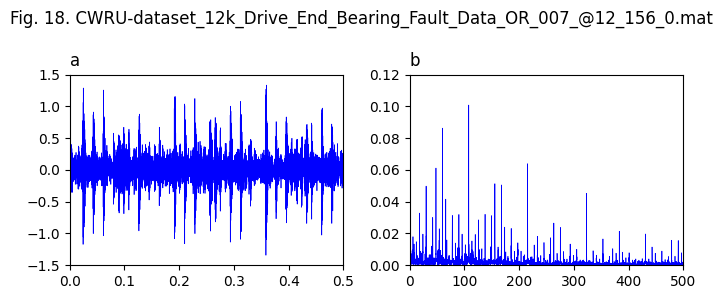

In [15]:
'''
Fig. 18. Record 156DE (12k, 0.007 in. drive end outer race fault opposite, 1797 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from
Method 1 (raw signal); Y2 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*156*.mat", recursive=True)
title = "Fig. 18. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0, 0.5), (-1.5, 1.5), None, (0, 0.12))

#### Fig. 19 (Method 2 ei toimi?)



[54000 54001 54002 ... 55917 55918 55919]
Inside randall_method_2


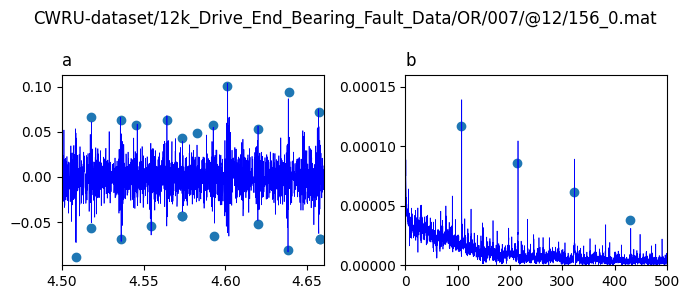

In [5]:
'''
Fig. 19. Record 156DE (12k, 0.007 in. drive end outer race fault opposite, 1797 rpm). (a) Time signal from Method 2 (prewhitening); cursors at 1/BPFO.
(b) Corresponding envelope spectrum; Y1 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*156*.mat", recursive=True)

# Exctract DE signal
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)

# num_samples = int(fs*10)
# signal = signal[:num_samples]
time = np.linspace(0,len(signal)/fs,len(signal))

mask = np.argwhere((4.5 < time) & (time < 4.66))[:,0]
print(mask)
t,s = randall_method_2(signal,fs)
s = s 
sq_env_f, sq_env = randall_method_1(s, fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
ax1.plot(time[mask], s[mask], c="b", linewidth=0.5)


ax1.set_xlim(4.5, 4.66)
#ax1.set_ylim(-0.11, 0.11)
ax1.set_title("a", loc="left")

ax2.plot(sq_env_f, sq_env/2 , c="b", linewidth=0.5)
ax2.set_xlim(0, 500)
ax2.set_ylim(0, 1.6e-4)
ax2.set_title("b", loc="left")

x = [4.50849582172702, 4.60125348189415, 4.536211699164345, 4.517827298050139, 4.564066852367688, 4.545543175487465, 4.582729805013927, 4.573676880222841, 4.5926183844011135, 4.619916434540389, 4.657242339832869, 4.638300835654595, 4.638857938718663, 4.657660167130919, 4.657660167130919, 4.593314763231198, 4.620055710306406, 4.536211699164345, 4.517966573816156, 4.554596100278551, 4.573676880222841, 4.573676880222841]
y = [-0.08824531516183987, 0.1005962521294719, 0.0632879045996593, 0.06584327086882455, 0.06277683134582623, 0.05792163543441228, 0.04846678023850087, 0.04284497444633731, 0.0571550255536627, 0.052810902896081785, 0.07197614991482112, -0.08083475298126065, 0.09420783645655878, -0.06882453151618399, -0.06882453151618399, -0.06575809199318569, -0.05221465076660988, -0.06908006814310051, -0.05706984667802385, -0.05477001703577513, -0.042759795570698464, -0.042759795570698464]
ax1.scatter(x,y)

x = [323.125, 430, 106.25, 214.21529134114584]
y = [0.00006183035714285714, 0.000037723214285714286, 0.00011651785714285716, 0.00008619791666666667]
ax2.scatter(x,y)

fig.suptitle(mat_files[0])
plt.tight_layout()
plt.show()

#### Fig. 25

Inside randall_method_2


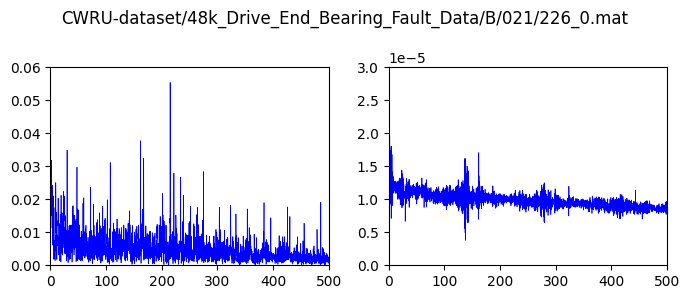

In [42]:
'''
Fig. 25. Record 226DE (48k, 0.021 in. drive end ball fault, 1797 rpm). (a) Envelope spectrum from Method 1 (raw signal); N1 diagnosis. (b) Envelope
spectrum from Method 2 (prewhitening); P1 diagnosis.
'''

fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*226*.mat", recursive=True)

# Extract DE signal
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)

sq_env_f, sq_env = randall_method_1(signal, fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

ax1.plot(sq_env_f, sq_env, c="b", linewidth=0.5)

t, s = randall_method_2(signal,fs)
mask = np.argwhere((4.5 < t) & (t < 4.66))[:,0]
sq_env_f2, sq_env2 = randall_method_1(s, fs)

ax2.plot(sq_env_f2, sq_env2, c="b", linewidth=0.5)

# Axis limits
ax1.set_xlim(0, 500)
ax1.set_ylim(0, 0.06)

ax2.set_xlim(0, 500)
ax2.set_ylim(0, 3e-5)

fig.suptitle(mat_files[0])
plt.tight_layout()
plt.show()

#### Fig. 26

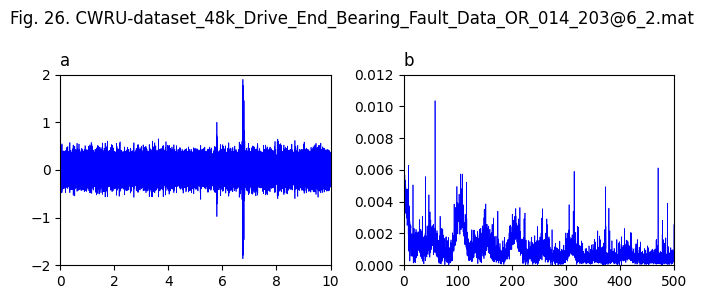

In [18]:
'''
Fig. 26. Record 203DE (48k, 0.014 in. drive end outer race fault centred, 1750 rpm). (a) Raw time signal. (b) Envelope spectrum from Method 1 (raw signal);
P2 diagnosis.
'''

fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*203*.mat", recursive=True)
title = "Fig. 26. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0, 10), (-2, 2), None, (0, 0.012))

#### Fig. 27

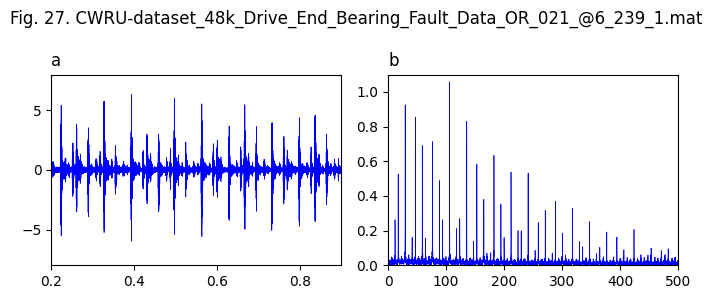

In [19]:
'''
Fig. 27. Record 239DE (48k, 0.021 in. drive end outer race fault centred, 1772 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method
1 (raw signal); Y2 diagnosis.
'''

fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*239*.mat", recursive=True)
title = "Fig. 27. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

'''
 x = [0.2236559139784946, 0.26021505376344084, 0.26021505376344084, 0.28978494623655915, 0.28978494623655915, 0.32634408602150544, 0.32634408602150544, 0.39247311827957, 0.39247311827957, 0.43064516129032265, 0.43064516129032265, 0.4591397849462366, 0.4591397849462366, 0.4956989247311828, 0.4956989247311828, 0.5252688172043012, 0.5634408602150538, 0.5634408602150538, 0.22311827956989244, 0.22311827956989244, 0.26021505376344084, 0.26021505376344084, 0.28978494623655915, 0.32634408602150544, 0.3930107526881721, 0.43225806451612914, 0.43225806451612914, 0.45752688172043016, 0.45752688172043016, 0.49677419354838726, 0.5258064516129033, 0.5258064516129033, 0.5639784946236559, 0.5639784946236559]
    y = [5.4409448818897665, 3.8818897637795278, 3.8818897637795278, 3.614173228346459, 3.614173228346459, 5.8976377952755925, 5.8976377952755925, 6.370078740157481, 6.370078740157481, 3.047244094488189, 3.047244094488189, 3.0314960629921277, 3.0314960629921277, 6.039370078740159, 6.039370078740159, 2.3858267716535444, 5.645669291338585, 5.645669291338585, -5.51968503937008, -5.51968503937008, -3.5039370078740157, -3.5039370078740157, -3.9448818897637805, -5.267716535433072, -5.9921259842519685, -2.8582677165354333, -2.8582677165354333, -3.5511811023622046, -3.5511811023622046, -5.40944881889764, -2.259842519685039, -2.259842519685039, -5.582677165354331, -5.582677165354331]
    ax1.scatter(x,y)
    
    x = [29.560585885485995, 29.560585885485995, 17.976031957390205, 46.33821571238353, 59.520639147802974, 77.09720372836219, 105.45938748335553, 105.45938748335553, 135.8189081225034, 135.8189081225034, 153.3954727030626, 153.3954727030626, 123.83488681757662, 123.83488681757662, 164.9800266311585, 182.55659121171772, 182.55659121171772, 193.7416777629827, 193.7416777629827, 240.87882822902793, 288.0159786950732, 318.7749667110519, 318.7749667110519, 299.6005326231691, 346.73768308921433, 346.73768308921433]
    y = [0.9315634218289084, 0.9315634218289084, 0.5256637168141594, 0.8584070796460175, 0.6884955752212389, 0.7215339233038347, 1.0743362831858405, 1.0743362831858405, 0.8371681415929204, 0.8371681415929204, 0.5823008849557522, 0.5823008849557522, 0.26961651917404134, 0.26961651917404134, 0.384070796460177, 0.6436578171091445, 0.6436578171091445, 0.35457227138643066, 0.35457227138643066, 0.536283185840708, 0.3699115044247788, 0.33687315634218284, 0.33687315634218284, 0.18466076696165193, 0.25191740412979347, 0.25191740412979347]
    ax2.scatter(x,y)
'''

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0.2, 0.9), (-8, 8), None, (0, 1.1))

#### Fig. 28

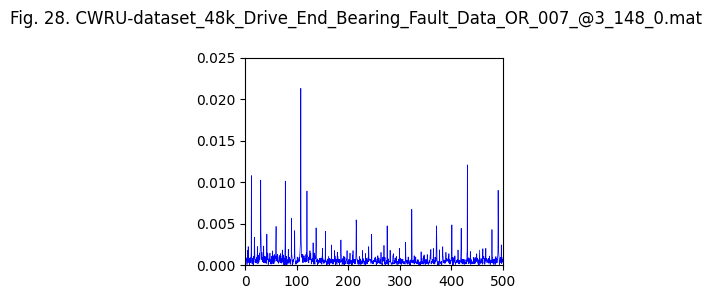

In [20]:
'''
Fig. 28. Record 148FE (48k, 0.007 in. drive end outer race fault orthogonal, 1797 rpm). Envelope spectrum from Method 1 (raw signal); Y1 diagnosis.
'''

fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*148*.mat", recursive=True)
title = "Fig. 28. " + mat_files[0].replace("/", "_")
_, signal, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_ax2_only(title, sq_env_f, sq_env, (0, 500), (0, 0.025))



#### Fig. 29

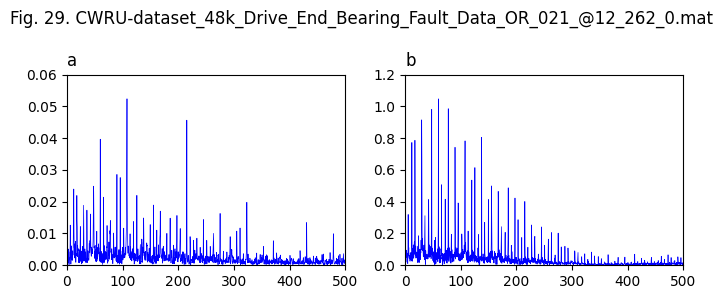

In [21]:
'''
Fig. 29. Envelope spectra from Method 1 (raw signal) (48k, drive end outer race fault opposite, 1797 rpm). (a) Record 161DE (0.007 in.); Y2 diagnosis. (b)
Record 262DE (0.021 in.); P1 diagnosis..
'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

fs = 48e3

mat_files = glob.glob("CWRU-dataset/**/*161*.mat", recursive=True)
title = "Fig. 29. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))
sq_env_f, sq_env = randall_method_1(signal, fs)
ax1.plot(sq_env_f, sq_env, c="b", linewidth=0.5)

ax1.set_xlim(0, 500)
ax1.set_ylim(0, 0.06)


mat_files = glob.glob("CWRU-dataset/**/*262*.mat", recursive=True)
title = "Fig. 29. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))
sq_env_f, sq_env = randall_method_1(signal, fs)
ax2.plot(sq_env_f, sq_env, c="b", linewidth=0.5)

ax2.set_xlim(0, 500)
ax2.set_ylim(0, 1.2)



ax1.set_title("a", loc="left")
ax2.set_title("b", loc="left")


fig.suptitle(title)
plt.tight_layout()
plt.show()



#### Fig. 34

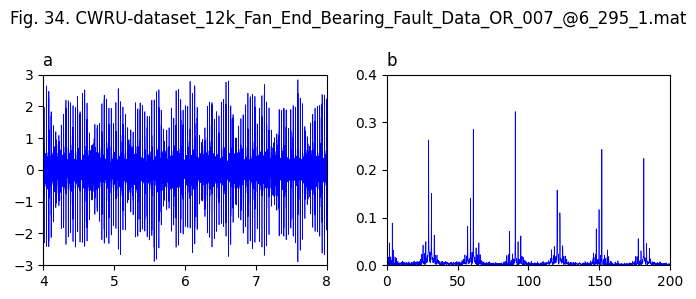

In [22]:
'''
Fig. 34. Record 295FE (12k, 0.007 in. fan end outer race fault centred, 1772 rpm). Raw time signal; cursors at 0.50 s (¼ 1/{BPFO–3fr}). (b) Envelope spectrum
from Method 1 (raw signal); finely tuned cursors at: fr harmonics (red), BPFO harmonics (black dash-dot), fr sidebands around BPFO (black dot); Y2
diagnosis. (For interpretation of the references to colour in this figure legend, the reader is referred to the web version of this article.)
'''



fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*295*.mat", recursive=True)
title = "Fig. 34. " + mat_files[0].replace("/", "_")
_, signal, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (4, 8), (-3, 3), (0, 200), (0, 0.4))

#### Fig. 35

Inside randall_method_2


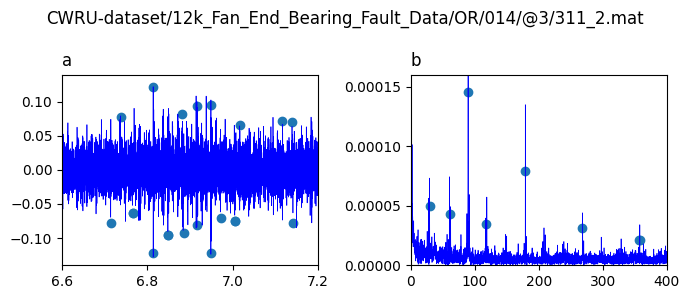

In [62]:
'''
Fig. 35. Record 311 (12k, 0.014 in. fan end outer race fault orthogonal, 1750 rpm). (a) Raw time signal; cursors at 1/fr, (b) Envelope spectrum from Method 1
(raw signal); Y2 diagnosis, (c) Time signal from Method 2 (prewhitening); cursors at 1/f r, and (d) Corresponding envelope spectrum; Y1 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*311*.mat", recursive=True)

signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)

# num_samples = int(fs*10)
# signal = signal[:num_samples]
time = np.linspace(0,len(signal)/fs,len(signal))

mask = np.argwhere((6.6 < time) & (time < 7.2))[:,0]
t,s = randall_method_2(signal,fs)
sq_env_f, sq_env = randall_method_1(s, fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

ax1.plot(time[mask], s[mask], c="b", linewidth=0.5)


ax1.set_xlim(6.6, 7.2)
ax1.set_ylim(-0.14, 0.14)
ax1.set_title("a", loc="left")

ax2.plot(sq_env_f, sq_env/2, c="b", linewidth=0.5)
ax2.set_xlim(0, 400)
ax2.set_ylim(0, 1.6e-4)
ax2.set_title("b", loc="left")

x = [6.813913043478261, 6.73695652173913, 6.714782608695653, 6.813260869565218, 6.9482608695652175, 6.9482608695652175, 6.88108695652174, 7.139347826086957, 7.115869565217392, 7.141304347826088, 7.004347826086957, 7.004347826086957, 6.848478260869565, 6.848478260869565, 6.765652173913043, 6.765652173913043, 7.017391304347827, 6.916304347826087, 6.915434782608696, 6.885000000000001, 6.971956521739131]
y = [0.12170900692840647, 0.07736720554272516, -0.07782909930715937, -0.1212471131639723, -0.12217090069284064, 0.09584295612009239, 0.08198614318706698, 0.07090069284064665, 0.07136258660508082, -0.07782909930715937, -0.07551963048498846, -0.07551963048498846, -0.0953810623556582, -0.0953810623556582, -0.06304849884526559, -0.06304849884526559, 0.06628175519630486, 0.09376443418013858, -0.08113933795227099, -0.09284064665127022, -0.07128560431100847]
ax1.scatter(x,y)

x = [89.27038626609442, 60.42918454935622, 178.88412017167383, 268.15450643776825, 357.0815450643777, 357.42489270386267, 118.11158798283262, 29.184549356223176]
y = [0.00014507575757575757, 0.00004261363636363637, 0.00007916666666666666, 0.00003162878787878788, 0.000021590909090909097, 0.000021590909090909097, 0.00003465909090909091, 0.000049810606060606065]

ax2.scatter(x,y)   

fig.suptitle(mat_files[0])
plt.tight_layout()
plt.show()


#### Fig. 36

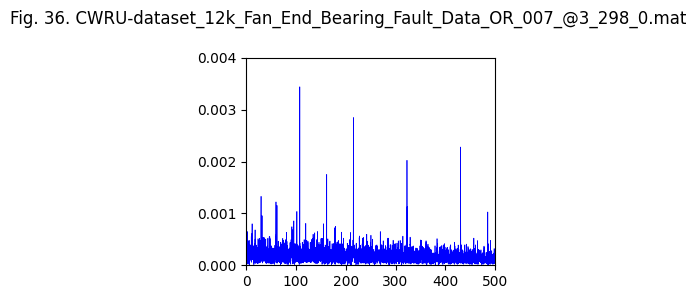

In [23]:
'''
Fig. 36. Record 298DE (12k, 0.007 in. fan end outer race fault orthogonal, 1797 rpm). Envelope spectrum from Method 1 (raw signal); N1 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*298*.mat", recursive=True)  
title = "Fig. 36. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_ax2_only(title, sq_env_f, sq_env, (0, 500), (0, 4e-3))


#### Fig. 37

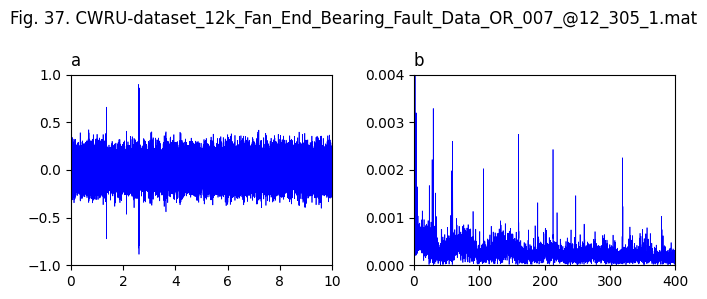

In [24]:
'''
Fig. 37. Record 305DE (12k, 0.007 in. fan end outer race fault opposite, 1772 rpm). (a) Raw time signal. (b) Envelope spectrum from Method 1 (raw signal);
P2 diagnosis.
'''



fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*305*.mat", recursive=True)
title = "Fig. 37. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0, 10), (-1, 1), (0, 400), (0, 0.004))

## 6.3.3. Ball Faults

#### Fig. 7

#### Fig. 8

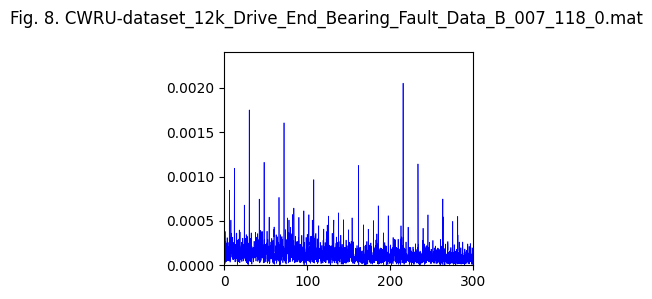

In [25]:
'''
Fig. 8. Record 118DE (12k, 0.007 in. drive end ball fault, 1797 rpm). Envelope spectrum from Method 1 (raw signal); finely tuned cursors at FTF (shown to
be 0.4 fr); N1 diagnosis.
'''

fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*118*.mat", recursive=True)
title = "Fig. 8. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
signal = signal / 2
time = np.linspace(0, len(signal)/fs, len(signal))

'''x = [12.794612794612808, 30.303030303030297, 30.303030303030297, 48.821548821548795, 48.821548821548795, 71.71717171717171, 71.71717171717171, 108.75420875420878, 108.75420875420878, 162.2895622895623, 215.15151515151518, 233.6700336700337, 262.62626262626264, 262.62626262626264, 281.4814814814815]
    y = [0.0010985915492957746, 0.0017605633802816902, 0.0017605633802816902, 0.001172535211267606, 0.001172535211267606, 0.0016161971830985916, 0.0016161971830985916, 0.0009823943661971832, 0.0009823943661971832, 0.0011654929577464789, 0.002066901408450704, 0.0011197183098591548, 0.0007676056338028169, 0.0007676056338028169, 0.0005633802816901409]'''

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_ax2_only(title, sq_env_f, sq_env, (0, 300), (0, 0.0024))




#### Fig. 10

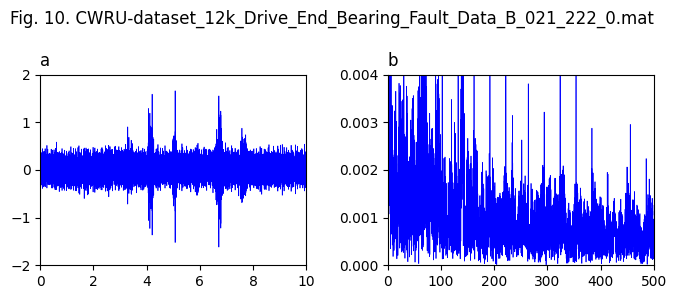

In [26]:
'''
Fig. 10. Record 222DE (12k, 0.021 in. drive end ball fault, 1797 rpm).
(a) Raw time signal. (b) Envelope spectrum from Method 1 (raw signal); P1 diagnosis.'
'''
fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*222*.mat", recursive=True)
title = "Fig. 10. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0,10), (-2,2), (0, 500), (0, 0.004))

#### Fig. 23

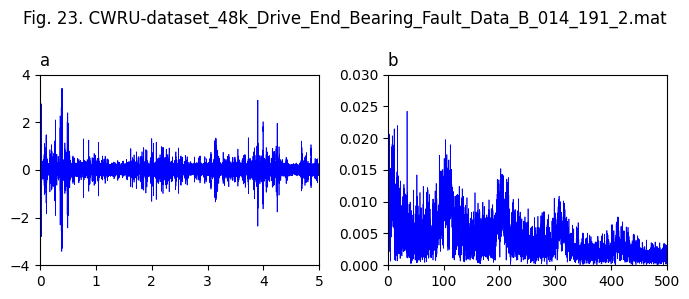

In [27]:
'''
Fig. 23. Record 191DE (48k, 0.014 in. drive end ball fault, 1750 rpm). (a) Raw time signal. (b) Envelope spectrum from Method 1 (raw signal); N1 diagnosis.
'''
fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*191*.mat", recursive=True)
title = "Fig. 23. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0,5), (-4,4), (0, 500), (0, 0.03))

#### Fig. 24

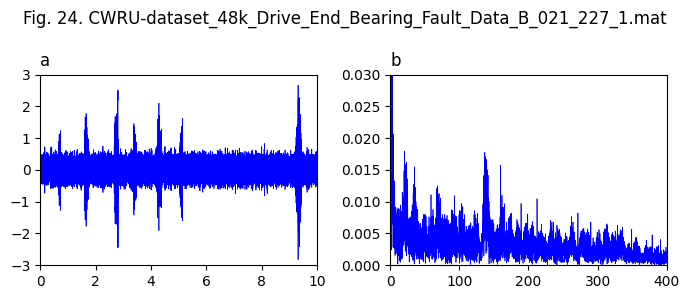

In [28]:
"Fig. 24. Record 227DE (48k, 0.021 in. drive end ball fault, 1772 rpm). (a) Raw time signal. (b) Envelope spectrum from Method 1 (raw signal); P1 diagnosis."

fs = 48e3
mat_files = glob.glob("CWRU-dataset/**/*227*.mat", recursive=True)
title = "Fig. 24. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env, (0,10), (-3,3), (0, 400), (0, 0.03))


#### Fig. 31

In [1]:
'''
Fig. 31. Record 282 (12k, 0.007 in. fan end ball fault, 1797 rpm). Envelope spectra from Method 1 (raw signal). (a) DE; P1 diagnosis. (b) FE; N1 diagnosis.
(c) BA; Y2 diagnosis.
'''

mat_files = glob.glob("CWRU-dataset/**/*282*.mat", recursive=True)
print("Files found:", mat_files)
title = "Fig. 31. " + mat_files[0].replace("/", "_")
signal1, signal2, signal3, rpm = du.extract_signals(mat_files[0], normal=False)
sq_env_f1, sq_env1 = randall_method_1(signal1, fs)
sq_env_f2, sq_env2 = randall_method_1(signal2, fs)
sq_env_f3, sq_env3 = randall_method_1(signal3, fs)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

ax1.plot(sq_env_f1, sq_env1, c="b", linewidth=0.5)
ax2.plot(sq_env_f2, sq_env2, c="b", linewidth=0.5)
ax3.plot(sq_env_f3, sq_env3, c="b", linewidth=0.5)

ax1.set_xlim(0, 400)
ax1.set_ylim(0, 0.002)
ax2.set_xlim(0, 400)
ax2.set_ylim(0, 0.015)
ax3.set_xlim(0, 400)
ax3.set_ylim(0, 0.008)

ax1.set_title("a", loc="left")
ax2.set_title("b", loc="left")
ax3.set_title("c", loc="left")

fig.suptitle(title)
plt.tight_layout()
plt.show()

NameError: name 'glob' is not defined

#### Fig. 32

Files found: ['CWRU-dataset/12k_Fan_End_Bearing_Fault_Data/B/007/283_1.mat']


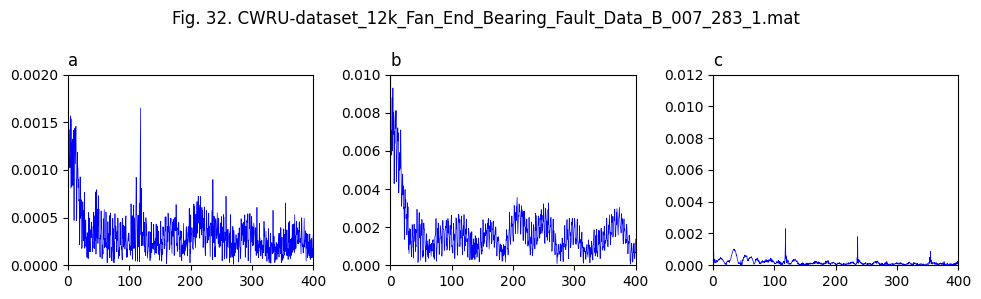

In [30]:
''' 
Fig. 32. Record 283 (12k, 0.007 in. fan end ball fault, 1772 rpm). Envelope spectra from Method 1 (raw signal). (a) DE; P2 diagnosis. (b) FE; P2 diagnosis.
(c) BA; Y2 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/*283*.mat", recursive=True)
print("Files found:", mat_files)
title = "Fig. 32. " + mat_files[0].replace("/", "_")
signal1, signal2, signal3, rpm = du.extract_signals(mat_files[0], normal=False)
sq_env_f1, sq_env1 = randall_method_1(signal1, fs)
sq_env_f2, sq_env2 = randall_method_1(signal2, fs)
sq_env_f3, sq_env3 = randall_method_1(signal3, fs)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

ax1.plot(sq_env_f1, sq_env1, c="b", linewidth=0.5)
ax2.plot(sq_env_f2, sq_env2, c="b", linewidth=0.5)
ax3.plot(sq_env_f3, sq_env3, c="b", linewidth=0.5)

ax1.set_xlim(0, 400)
ax1.set_ylim(0, 0.002)
ax2.set_xlim(0, 400)
ax2.set_ylim(0, 0.01)
ax3.set_xlim(0, 400)
ax3.set_ylim(0, 0.012)

ax1.set_title("a", loc="left")
ax2.set_title("b", loc="left")
ax3.set_title("c", loc="left")

fig.suptitle(title)
plt.tight_layout()
plt.show()


## Method 3

Computing the DRS: 100%|██████████| 104099/104099 [00:00<00:00, 162608.68it/s]


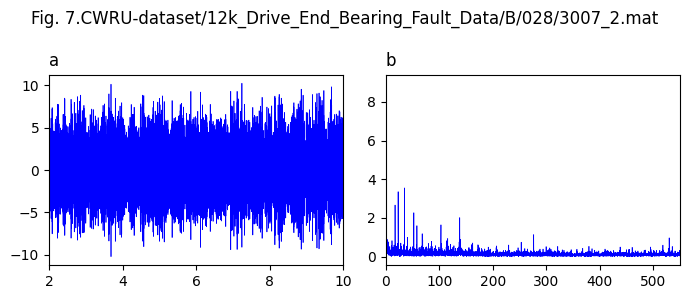

Computing the DRS: 100%|██████████| 105686/105686 [00:00<00:00, 156609.70it/s]


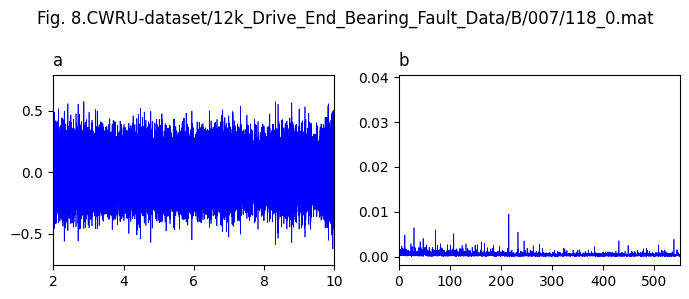

Computing the DRS: 100%|██████████| 105106/105106 [00:00<00:00, 156172.99it/s]


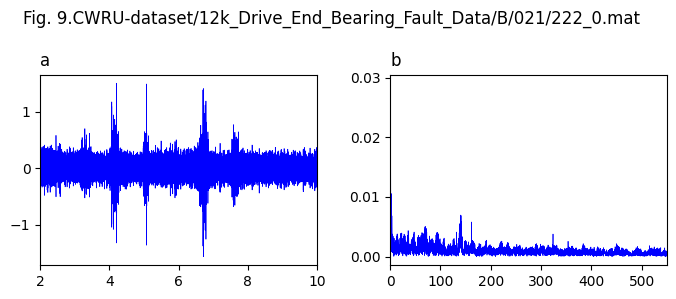

In [31]:
fs = 12e3

''' 
Fig. 7. Record 3007DE (12k, 0.028 in. drive end ball fault, 1750 rpm). Envelope spectrum from Method 3 (benchmark); cursors at: fr (red dot), BSF
harmonics (red dash-dot), sidebands spaced at FTF around 2 × BSF and 4 × BSF (red dot); Y1 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/3007*.mat", recursive=True)
title = "Fig. 7." +  mat_files[0]

signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
t, s, sq_env_f, sq_env = randall_method_3(signal, fs, N=16384, Delta=500)

plot_method_3(title, t, s, sq_env_f, sq_env)

'''
Fig. 8. Record 118DE (12k, 0.007 in. drive end ball fault, 1797 rpm). Envelope spectrum from Method 1 (raw signal); finely tuned cursors at FTF (shown to
be 0.4 fr); N1 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/118*.mat", recursive=True)
title = "Fig. 8." +  mat_files[0]

signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
t, s, sq_env_f, sq_env = randall_method_3(signal, fs, N=16384, Delta=500)

plot_method_3(title, t, s, sq_env_f, sq_env)

'''
Fig. 9. Record 222DE (12k, 0.021 in. drive end ball fault, 1797 rpm).
Envelope spectrum from Method 3 (benchmark); Y2 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/222*.mat", recursive=True)
title = "Fig. 9." +  mat_files[0]

signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
t, s, sq_env_f, sq_env = randall_method_3(signal, fs, N=16384, Delta=500)

plot_method_3(title, t, s, sq_env_f, sq_env)